In [7]:
# Library Imports
import tarfile
import pandas as pd
import os

In [12]:
# Tar Folder Extraction
files = [f for f in os.listdir("./Data/RawUnzippedFolders/")]
for fname in files: 
    print(fname)
    if fname.endswith(".tar.gz"):
        print(fname)
        full_path = os.path.join("./Data/RawUnzippedFolders/", fname)
        print(full_path)
        tar = tarfile.open(full_path, "r:*")
        tar.extractall()
        tar.close()

#Flattening Baseline (Multilayer perceptron)

#CNN feeding images directly 

part1.tar.gz
part1.tar.gz
./Data/RawUnzippedFolders/part1.tar.gz
part2.tar.gz
part2.tar.gz
./Data/RawUnzippedFolders/part2.tar.gz
part3.tar.gz
part3.tar.gz
./Data/RawUnzippedFolders/part3.tar.gz


In [ ]:
#Merge All Data Into One Folder
import shutil

base_dir = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders"

folder_endings = ["part1", "part2", "part3"]

destination = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/AllData"

file_counter = 0
for folder in folder_endings:
    folder_dir = os.path.join(base_dir, folder)
    files = [f for f in os.listdir(folder_dir)]

    for filename in files:
        file_dir = os.path.join(folder_dir, filename)
        shutil.move(file_dir, destination)
        file_counter += 1
        print(file_counter)


In [7]:
# Ensure only JPGs
files_deleted = 0
for filename in os.listdir(destination):
    if not filename.endswith(".jpg"):
        file_path = os.path.join(destination, filename)
        os.remove(file_path)
        files_deleted += 1
        print(files_deleted)

1
2


In [1]:
#Importing Libraries For Data Preprocessing

# Set up CUDA in OS
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# Import libabries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import seaborn as sn
import pandas as pd
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision import datasets, models, transforms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import time
import copy

In [ ]:
# Tracking Proportions of classes
base_destination = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders"

white_destination = os.path.join(base_destination, "AllWhite")
black_destination = os.path.join(base_destination, "AllBlack")
asian_destination = os.path.join(base_destination, "AllAsian")
indian_destination = os.path.join(base_destination, "AllIndian")
other_destination = os.path.join(base_destination, "AllOther")

total_white = 0
total_black = 0
total_asian = 0
total_indian = 0
total_other = 0

source_dir = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/AllData"

files = [f for f in os.listdir(source_dir)]

for filename in files:
    print(filename)
    class_label = filename.split("_")[2]
    print(class_label)
    file_dir = os.path.join(source_dir, filename)
    
    
    #White
    if class_label == "0":
        shutil.copy(file_dir, white_destination)
        total_white += 1
    #Black
    elif class_label == "1":
        shutil.copy(file_dir, black_destination)
        total_black += 1
    #Asian
    elif class_label == "2":
        shutil.copy(file_dir, asian_destination)
        total_asian += 1
    #Indian
    elif class_label == "3":
        shutil.copy(file_dir, indian_destination)
        total_indian += 1
    #Other
    elif class_label == "4":
        shutil.copy(file_dir, other_destination)
        total_other += 1


In [21]:
# Data Proportions
total_data = total_white + total_black + total_asian + total_indian + total_other

print(f"Total White: {total_white}\nWhite Proportion: {total_white/total_data}")
print(f"Total Black: {total_black}\nBlack Proportion: {total_black/total_data}")
print(f"Total Asian: {total_asian}\nAsian Proportion: {total_asian/total_data}")
print(f"Total Indian: {total_indian}\nIndian Proportion: {total_indian/total_data}")
print(f"Total Other: {total_other}\nOther Proportion: {total_other/total_data}")

#Consider disregarding other due to extrememly low proportion

Total White: 10222
White Proportion: 0.42409658548728374
Total Black: 4558
Black Proportion: 0.18910509065261585
Total Asian: 3586
Asian Proportion: 0.14877816039497158
Total Indian: 4027
Indian Proportion: 0.16707463801186576
Total Other: 1710
Other Proportion: 0.07094552545326308


In [22]:
# Train / Test Splits
def train_test_split_copy_random(source_dir, folders, trainpercentage):

    # Make train / test folders
    os.mkdir(os.path.join(source_dir, "Train"))
    os.mkdir(os.path.join(source_dir, "Test"))

    for folder in folders:
        folder_path = os.path.join(source_dir, folder)
        files = os.listdir(folder_path)

        # Randomly Select Training Files
        train_files = np.random.choice(files, int(len(files) * trainpercentage))
        test_files = [x for x in files if x not in train_files]
        
        print(f"Folder {folder}")
        print(f"Train Files: {len(train_files)}")
        print(f"Test Files: {len(test_files)}")

        # Make Class Label Folders In Train / Test
        os.mkdir(os.path.join(source_dir, "Train", folder))
        os.mkdir(os.path.join(source_dir, "Test", folder))


        for file in train_files:
            source_file_path = os.path.join(source_dir, folder, file)
            dest_file_path = os.path.join(source_dir, "Train", folder, file)
            shutil.copy(source_file_path, dest_file_path)

        for file in test_files:
            source_file_path = os.path.join(source_dir, folder, file)
            dest_file_path = os.path.join(source_dir, "Test", folder, file)
            shutil.copy(source_file_path, dest_file_path)


base_source = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders"
folders = ["White", "Black", "Asian", "Indian", "Other"]

train_test_split_copy_random(base_source, folders, .8)

Folder White
Train Files: 8177
Test Files: 4574
Folder Black
Train Files: 3646
Test Files: 2072
Folder Asian
Train Files: 2868
Test Files: 1610
Folder Indian
Train Files: 3221
Test Files: 1805
Folder Other
Train Files: 1368
Test Files: 754


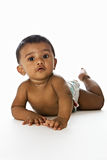

In [2]:
# Data Directories
# Training directories
train_dir = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/Train/"
train_whiteclass_dir = os.path.join(train_dir, "White")
train_blackclass_dir = os.path.join(train_dir, "Black")
train_asianclass_dir = os.path.join(train_dir, "Asian")
train_indianclass_dir = os.path.join(train_dir, "Indian")
train_otherclass_dir = os.path.join(train_dir, "Other")


# Testing Directories
test_dir = "/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/Test/"
test_whiteclass_dir = os.path.join(test_dir, "White")
test_blackclass_dir = os.path.join(test_dir, "Black")
test_asianclass_dir = os.path.join(test_dir, "Asian")
test_indianclass_dir = os.path.join(test_dir, "Indian")
test_otherclass_dir = os.path.join(test_dir, "Other")

# Example Image
white_torch = torchvision.io.read_image("/Users/Andrew/Documents/FacialRecognitionRacialBias/Data/RawUnzippedFolders/Train/Black/1_0_1_20161219160115237.jpg")

T.ToPILImage()(white_torch)

In [3]:
# Image Preprocessing
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),   #must same as here
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),   #must same as here
     transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transforms_train)
test_dataset = datasets.ImageFolder(test_dir, transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=12, shuffle=True, num_workers=0)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=12, shuffle=False, num_workers=0)

# Data Glimpse (Make Sure Everything Makes Sense Ya Feel Me (Allen If You Are Reading This I Hate You))
print('Train dataset size:', len(train_dataset))
print('Test dataset size:', len(test_dataset))
class_names = train_dataset.classes
print('Class names:', class_names)

Train dataset size: 13288
Test dataset size: 10815
Class names: ['Asian', 'Black', 'Indian', 'Other', 'White']


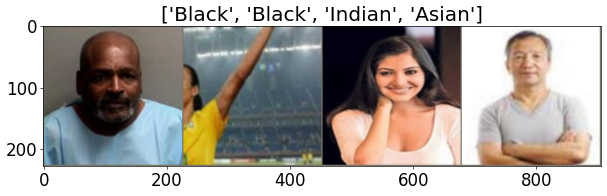

In [11]:
# Visualize Transformation

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})
def imshow(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # undo image normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()
# load a batch of train image
iterator = iter(train_dataloader)
# visualize a batch of train image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow(out, title=[class_names[x] for x in classes[:4]])

In [4]:

device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.resnet18(pretrained=True)

num_features = model.fc.in_features 
print('Number of features from pre-trained model', num_features)

model.fc = nn.Linear(num_features, 5)
model = model.to(device)


c:\Users\Andrew\Documents\FacialRecognitionRacialBias\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Andrew\Documents\FacialRecognitionRacialBias\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Number of features from pre-trained model 512


In [5]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

# Set Random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [6]:
# Setting up CUDA
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

Is CUDA supported by this system? True
CUDA version: 12.1


In [7]:
#### Train model
train_loss=[]
train_accuary=[]
test_loss=[]
test_accuary=[]

num_epochs = 20   #(set no of epochs)
start_time = time.time() #(for showing time)
# Start loop
for epoch in range(num_epochs): #(loop for every epoch)
    print("Epoch {} running".format(epoch)) #(printing message)
    """ Training Phase """
    model.train()    #(training model)
    running_loss = 0.   #(set loss 0)
    running_corrects = 0 
    # load a batch data of images
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device) 
        # forward inputs and get output
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        # get loss value and update the network weights
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data).item()
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects / len(train_dataset) * 100.
    # Append result
    train_loss.append(epoch_loss)
    train_accuary.append(epoch_acc)
    # Print progress
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch+1, epoch_loss, epoch_acc, time.time() -start_time))
    """ Testing Phase """
    model.eval()
    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data).item()
        epoch_loss = running_loss / len(test_dataset)
        epoch_acc = running_corrects / len(test_dataset) * 100.
        # Append result
        test_loss.append(epoch_loss)
        test_accuary.append(epoch_acc)
        # Print progress
        print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch+1, epoch_loss, epoch_acc, time.time()- start_time))

Epoch 0 running
[Train #1] Loss: 0.1026 Acc: 52.2953% Time: 123.7230s
[Test #1] Loss: 0.0812 Acc: 64.7989% Time: 196.3251s
Epoch 1 running
[Train #2] Loss: 0.0851 Acc: 62.0786% Time: 314.5024s
[Test #2] Loss: 0.0727 Acc: 68.3495% Time: 384.1674s
Epoch 2 running
[Train #3] Loss: 0.0794 Acc: 65.1114% Time: 504.0843s
[Test #3] Loss: 0.0683 Acc: 70.6704% Time: 573.1754s
Epoch 3 running
[Train #4] Loss: 0.0755 Acc: 67.0229% Time: 693.0448s
[Test #4] Loss: 0.0641 Acc: 72.7970% Time: 762.6607s
Epoch 4 running
[Train #5] Loss: 0.0731 Acc: 67.7077% Time: 882.5877s
[Test #5] Loss: 0.0619 Acc: 74.1193% Time: 952.3653s
Epoch 5 running
[Train #6] Loss: 0.0709 Acc: 68.8140% Time: 1071.5295s
[Test #6] Loss: 0.0605 Acc: 74.7295% Time: 1140.6054s
Epoch 6 running
[Train #7] Loss: 0.0688 Acc: 69.9503% Time: 1260.0469s
[Test #7] Loss: 0.0596 Acc: 75.2381% Time: 1329.5426s
Epoch 7 running
[Train #8] Loss: 0.0674 Acc: 70.5825% Time: 1449.0662s
[Test #8] Loss: 0.0578 Acc: 75.8206% Time: 1517.9233s
Epoch 8 ru